In [1]:
import matplotlib.pyplot as plt
import joblib
import numpy as np

In [2]:
with open(r'/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/active_learning_fixed_originalgroups.sav', 'rb') as fr:
    [X_train_list, Y_train_list,
     iterX_f1_scores_list, iterX_macro_scores_list, iterX_predict_prob_list,
     sampled_idx_list] = joblib.load(fr)
with open(r'/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/shuffled_train_data.sav', 'rb') as fr:
    [features_runlist, targets_runlist] = joblib.load(fr)

In [3]:
it = 19
i = 5
# random samples
total_counts_it = [len(np.where(Y_train_list[it][i]==b)[0]) for b in np.unique(Y_train_list[it][i])]
X_samp = []
Y_samp = []
for j in range(len(total_counts_it)):
    idx_b = np.where(targets_runlist[i] == j)[0]
    X_samp.append(features_runlist[i][idx_b[:total_counts_it[int(j)]]])
    Y_samp.append(targets_runlist[i][idx_b[:total_counts_it[int(j)]]])
X_samp_ = np.vstack(X_samp)
Y_samp_ = np.hstack(Y_samp)

## plot random samples

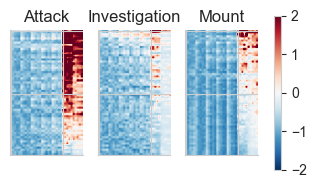

In [6]:
behavior_types = ['Attack', 'Investigation', 'Mount']
rows = 1
cols = 3
count = 0
samp_count = 60
fig, ax = plt.subplots(rows, cols, figsize=(4, 2), sharey=True, sharex=True)
selected_indices = [0, 1, 2, 3,
                    9, 10, 11,
                    17, 18,
                    24,
                    35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
not_selected_indices = [x for x in np.arange(X_samp_.shape[1])
                        if x not in selected_indices if x < 45]
feats_idx_pick = np.hstack([not_selected_indices, np.arange(90, 100)])
for row in range(rows):
    for col in range(cols):
        idx_b_samp = np.where(Y_samp_ == count)[0]
        np.random.seed(42)
        idx_subsampled = np.random.choice(len(idx_b_samp), samp_count, replace=False)
        idx_sorted = np.argsort(np.mean(X_samp_[idx_b_samp[idx_subsampled]][:, feats_idx_pick], axis=1))
        if col == cols-1:
            pos = ax[col].imshow(X_samp_[idx_b_samp[idx_subsampled]][:, feats_idx_pick][idx_sorted[::-1], :], cmap='RdBu_r', vmin=-2, vmax=2)
        else:
            ax[col].imshow(X_samp_[idx_b_samp[idx_subsampled]][:, feats_idx_pick][idx_sorted[::-1], :], cmap='RdBu_r', vmin=-2, vmax=2)
        ax[col].set_yticks(np.arange(0, samp_count, int(samp_count/2)))
        ax[col].set_xticks(np.arange(0, 35, 25))
        ax[col].set_xticklabels('')
        ax[col].set_yticklabels('')
        ax[col].set_title(behavior_types[int(count)])
        ax[col].spines['right'].set_visible(False)
        ax[col].spines['top'].set_visible(False)
        count += 1
fig.colorbar(pos, ax=ax, anchor=(0, 0.3), shrink=1)
plt.show()

## plot active samples

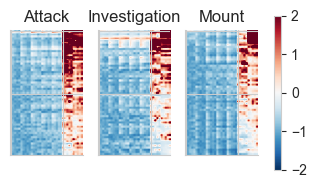

In [7]:
rows = 1
cols = 3
count = 0
samp_count = 60
fig, ax = plt.subplots(rows, cols, figsize=(4, 2), sharey=True, sharex=True)
selected_indices = [0, 1, 2, 3,
                    9, 10, 11,
                    17, 18,
                    24,
                    35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
not_selected_indices = [x for x in np.arange(X_samp_.shape[1])
                        if x not in selected_indices if x < 45]
feats_idx_pick = np.hstack([not_selected_indices, np.arange(90, 100)])
for row in range(rows):
    for col in range(cols):
        idx_b_samp = np.where(Y_train_list[it][i] == count)[0]
        np.random.seed(42)
        idx_subsampled = np.random.choice(len(idx_b_samp), samp_count, replace=False)
        idx_sorted = np.argsort(np.mean(X_train_list[it][i][idx_b_samp[idx_subsampled]][:, feats_idx_pick],
                                        axis=1))
        if col == cols-1:
            pos = ax[col].imshow(X_train_list[it][i][idx_b_samp[idx_subsampled]][:, feats_idx_pick][idx_sorted[::-1], :], cmap='RdBu_r', vmin=-2, vmax=2)

        else:
            ax[col].imshow(X_train_list[it][i][idx_b_samp[idx_subsampled]][:, feats_idx_pick][idx_sorted[::-1], :], cmap='RdBu_r', vmin=-2, vmax=2)

        ax[col].set_yticks(np.arange(0, samp_count, int(samp_count/2)))
        ax[col].set_xticks(np.arange(0, 35, 25))
        ax[col].set_xticklabels('')
        ax[col].set_yticklabels('')
        ax[col].set_title(behavior_types[int(count)])
        ax[col].spines['right'].set_visible(False)
        ax[col].spines['top'].set_visible(False)
        count += 1
fig.colorbar(pos, ax=ax, anchor=(0, 0.3), shrink=1)
plt.show()